<a href="https://colab.research.google.com/github/lakshanmamalgaha/ride-fare-classification/blob/master/final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

test_data = "test.csv"
test = pd.read_csv(test_data)

train_data = "train.csv"
train = pd.read_csv(train_data)

train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

In [ ]:
train['pickup_time'] = pd.to_datetime(train['pickup_time'],format='%m/%d/%Y %H:%M')
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
#checking for missing values
#train[pd.isnull(train)].sum()
train.isnull().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare']).set_title("Distribution of Trip Fare")

In [ ]:
train=train.loc[train['fare']>0]
train.shape

(17025, 14)

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['fare'])).set_title("Distribution of Trip Fare(log scale)")

correct      15495
incorrect     1681
Name: label, dtype: int64

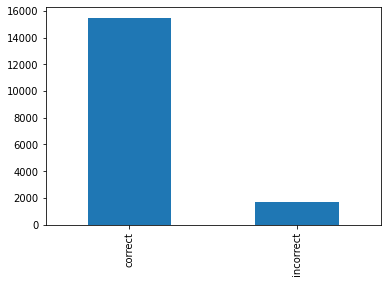

In [ ]:

train['label'].value_counts().plot(kind='bar')
train['label'].value_counts()

Dataset shows that there were 15495 correct fares and 1681 incorrect fares

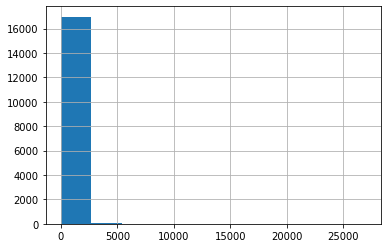

In [ ]:
train['fare'].hist()

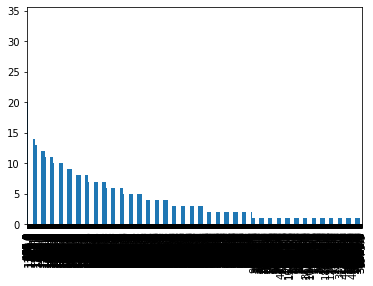

In [ ]:
train['duration'].value_counts().plot(kind='bar')

**Compare fare rates with different variables**

In [ ]:
def fare_stacked_bar(variable):
  Correct = train[train['label']=='correct'][variable].value_counts()/len(train['label']=='correct')
  Incorrect = train[train['label']=='incorrect'][variable].value_counts()/len(train['label']=='incorrect')
  data = pd.DataFrame([Correct,Incorrect])
  data.index=['Incorrect','Correct']
  data.plot(kind='bar',stacked=True,title='fare')
  return data.head()

In [ ]:
fare_stacked_bar('duration')

In [ ]:
fare_stacked_bar('fare')

In [ ]:
fare_stacked_bar('meter_waiting')

check for missing values

In [ ]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

tripid: 0 missing values
additional_fare: 202 missing values
duration: 202 missing values
meter_waiting: 202 missing values
meter_waiting_fare: 202 missing values
meter_waiting_till_pickup: 202 missing values
pickup_time: 0 missing values
drop_time: 0 missing values
pick_lat: 0 missing values
pick_lon: 0 missing values
drop_lat: 0 missing values
drop_lon: 0 missing values
fare: 137 missing values
label: 0 missing values


In [ ]:
train_duration_median = train['duration'].median()
train_duration_median

1702.8580770590315

Replace null durations with medial

In [ ]:
#train["duration"] = train['duration'].fillna(fill_duration(train,train_duration_median))
train['duration'].fillna((train['duration'].mean()), inplace=True)
train['additional_fare'].fillna((train['additional_fare'].mean()), inplace=True)
train['meter_waiting'].fillna((train['meter_waiting'].mean()), inplace=True)
train['meter_waiting_fare'].fillna((train['meter_waiting_fare'].mean()), inplace=True)
train['meter_waiting_till_pickup'].fillna((train['meter_waiting_till_pickup'].mean()), inplace=True)
train['fare'].fillna((train['fare'].mean()), inplace=True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.shape

(17176, 14)

In [ ]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

tripid: 0 missing values
additional_fare: 0 missing values
duration: 0 missing values
meter_waiting: 0 missing values
meter_waiting_fare: 0 missing values
meter_waiting_till_pickup: 0 missing values
pickup_time: 0 missing values
drop_time: 0 missing values
pick_lat: 0 missing values
pick_lon: 0 missing values
drop_lat: 0 missing values
drop_lon: 0 missing values
fare: 0 missing values
label: 0 missing values


In [ ]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [ ]:
train['label'].replace({"correct": 1, "incorrect": 0}, inplace=True)
print(train["label"])

0        1
1        1
2        1
3        1
5        1
        ..
17171    1
17172    1
17173    1
17174    1
17175    1
Name: label, Length: 16968, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tripid                     17176 non-null  int64         
 1   additional_fare            17176 non-null  float64       
 2   duration                   17176 non-null  float64       
 3   meter_waiting              17176 non-null  float64       
 4   meter_waiting_fare         17176 non-null  float64       
 5   meter_waiting_till_pickup  17176 non-null  float64       
 6   pickup_time                17176 non-null  datetime64[ns]
 7   drop_time                  17176 non-null  object        
 8   pick_lat                   17176 non-null  float64       
 9   pick_lon                   17176 non-null  float64       
 10  drop_lat                   17176 non-null  float64       
 11  drop_lon                   17176 non-null  float64       
 12  fare

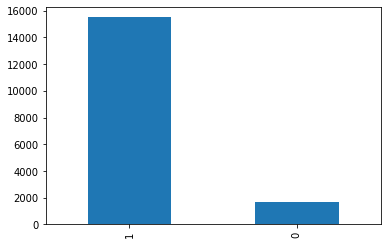

In [ ]:
train['label'].value_counts().plot(kind='bar')
train.info()

remove pickup time and drop time


In [ ]:
train.drop(['pickup_time','drop_time'],inplace=True,axis=1)
train.tail()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
17171,213803193,10.5,838.0,93.0,5.4219,451.0,7.29073,80.6367,7.28891,80.6557,198.26,1
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,6.90569,79.8516,6.95089,79.9389,581.23,1
17173,213813930,10.5,263.0,9.0,0.0000,110.0,7.09210,79.9000,7.10135,79.9017,76.20,1
17174,213815405,10.5,858.0,115.0,0.0000,317.0,6.94540,79.8768,6.93574,79.9010,133.31,1
17175,213817296,10.5,262.0,21.0,1.2243,23.0,6.90257,79.9557,6.90823,79.9374,98.57,1


In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X=train.drop(['label'],axis=1)
Y=train['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [ ]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Incorrect","Predicted Correct"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Incorrect","Predicted Correct"]
    cm.index=["Actual Incorrect","Actual Correct"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=5)
    return cm

In [ ]:
def aucscore(model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg)))
confusion_matrix_model(log_reg)

Accuracy: 0.9022580555891866


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.0,1.0
Actual Correct,0.0,1.0


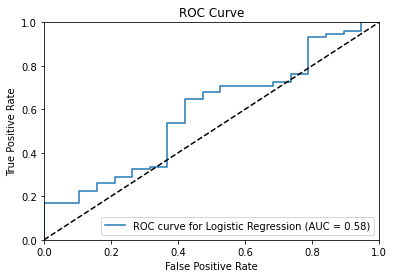

In [ ]:
plt_roc_curve("Logistic Regression",log_reg,has_proba=True)

# Support vector

In [ ]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_rbf)))
confusion_matrix_model(SVC_rbf)

Accuracy: 0.9022580555891866


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.0,1.0
Actual Correct,0.0,1.0


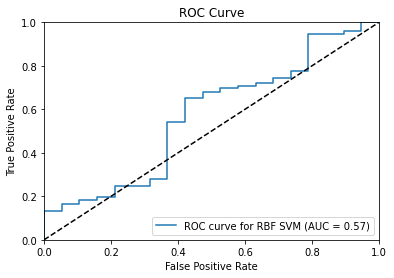

In [ ]:
plt_roc_curve("RBF SVM",SVC_rbf,has_proba=False)

## Random Forest

In [ ]:
ranfor = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranfor = ranfor.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(ranfor)))
confusion_matrix_model(ranfor)

Accuracy: 0.9212532646107547


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.21053,0.78947
Actual Correct,0.00654,0.99346


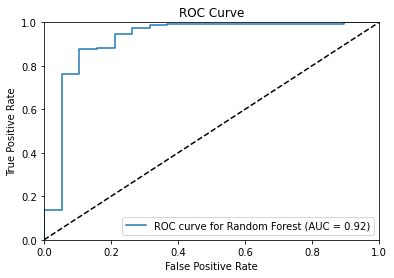

In [ ]:
plt_roc_curve("Random Forest",ranfor,has_proba=True)

## Decision tree

In [ ]:
Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(Dec_tree)))
confusion_matrix_model(Dec_tree)

Accuracy: 0.9298396146462113


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.52632,0.47368
Actual Correct,0.00654,0.99346


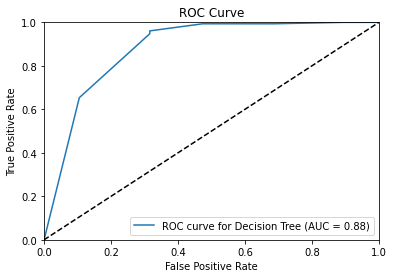

In [ ]:
plt_roc_curve("Decision Tree",Dec_tree,has_proba=True)

## K-Nearest Neighbour

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(KNN)))
confusion_matrix_model(KNN)

Accuracy: 0.8971415154712282


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.00000,1.00000
Actual Correct,0.00654,0.99346


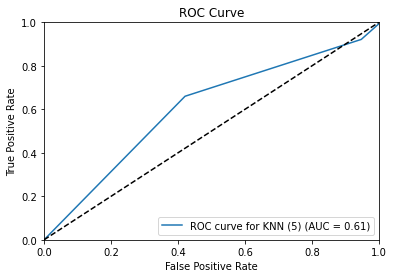

In [ ]:
plt_roc_curve("KNN (5)",KNN,has_proba=True)

## XGboost

In [ ]:
xgclass = xgb.XGBClassifier(max_depth=100, n_estimators=300, learning_rate=0.001).fit(x_train, y_train)
print("Accuracy: " + str(acc_score(xgclass)))
confusion_matrix_model(xgclass)

Accuracy: 0.9393080235916772


,Predicted Incorrect,Predicted Correct
Actual Incorrect,0.68421,0.31579
Actual Correct,0.01307,0.98693


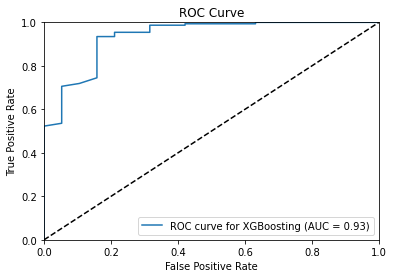

In [ ]:
plt_roc_curve("XGBoosting",xgclass,has_proba=True)


## Compare accuracy and AUC score

In [ ]:
Classifiers=["Logistic Regression","K-Nearest Neighbours","Decision Tree","Random Forest","XGBoost"]
Acc=[acc_score(x) for x in [log_reg,KNN,Dec_tree,ranfor,xgclass]]
auc_scores_prob=[aucscore(x,has_proba=True) for x in [log_reg,KNN,Dec_tree,ranfor,xgclass]]
auc_scores=auc_scores_prob
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.902258,0.583419
1,K-Nearest Neighbours,0.897142,0.605607
2,Decision Tree,0.929840,0.881493
3,Random Forest,0.921253,0.921225
4,XGBoost,0.939308,0.934985


In [ ]:
test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [ ]:
for i in test.columns:
    print (i + ": "+str(sum(test[i].isnull()))+" missing values")

tripid: 0 missing values
additional_fare: 0 missing values
duration: 0 missing values
meter_waiting: 0 missing values
meter_waiting_fare: 0 missing values
meter_waiting_till_pickup: 0 missing values
pickup_time: 0 missing values
drop_time: 0 missing values
pick_lat: 0 missing values
pick_lon: 0 missing values
drop_lat: 0 missing values
drop_lon: 0 missing values
fare: 0 missing values


In [ ]:
test.drop(['pickup_time','drop_time'],inplace=True,axis=1)
test.tail()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
8571,222856243,10.5,1723,429,24.83332,3,6.85103,79.9567,6.85588,79.9214,388.48
8572,222857785,10.5,1378,80,0.00000,125,6.91293,79.9656,6.92112,79.8980,379.85
8573,222858416,10.5,418,56,3.28440,93,6.85718,79.9081,6.83868,79.9083,112.79
8574,222858691,10.5,1604,548,31.67440,17,6.91289,79.8846,6.93159,79.9145,248.46
8575,222860703,10.5,1698,691,32.88820,42,6.91682,79.9192,6.87020,79.9340,339.63


In [ ]:
pred_test=xgclass.predict(test)
submission=pd.DataFrame({"tripid": test["tripid"], "prediction": pred_test})
submission.to_csv("submission.csv",index=False)



In [ ]:
score=xgclass.predict(test)